In [1]:
#importing libraries and reading the train_cab.csv file 
import pandas as pd
from datetime import datetime
from pytz import timezone
from math import radians, sin,cos ,acos
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
df=pd.read_csv(r'C:\Users\Niketa Mittal\Downloads\train_cab.csv')
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [2]:
#reading the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16065 entries, 0 to 16064
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        16041 non-null  float64
 1   pickup_datetime    16065 non-null  object 
 2   pickup_longitude   16065 non-null  float64
 3   pickup_latitude    16065 non-null  float64
 4   dropoff_longitude  16065 non-null  float64
 5   dropoff_latitude   16065 non-null  float64
 6   passenger_count    16010 non-null  float64
dtypes: float64(6), object(1)
memory usage: 878.7+ KB


In [3]:
#removing cases where pickup and drop locations are same
df=df[(df['pickup_longitude']!=df['dropoff_longitude'])]
df=df[(df['pickup_latitude']!=df['dropoff_latitude'])]
df.shape

(15601, 7)

In [4]:
#checking isnull counts in the parameters
df.isnull().sum()

fare_amount          22
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
dtype: int64

In [5]:
#checking for cases where latitudes and longitudes are 0 as they are not null
print(df[df['pickup_longitude']==0].shape)
print(df[df['pickup_latitude']==0].shape)
print(df[df['dropoff_longitude']==0].shape)
print(df[df['dropoff_latitude']==0].shape)

(12, 7)
(12, 7)
(10, 7)
(9, 7)


In [6]:
#Imputing missing and 0 values
df["fare_amount"]=pd.to_numeric(df["fare_amount"])
df["fare_amount"].fillna(df["fare_amount"].mean(), inplace=True)
df["passenger_count"].fillna(int(df["passenger_count"].mode()), inplace=True)
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['pickup_datetime']=df['pickup_datetime'].map(datetime.toordinal)
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,733573,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,733777,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,734367,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,734614,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,733840,-73.968095,40.768008,-73.956655,40.783762,1.0


In [7]:
#Since the values are 0 (they will not come under isna and fillna condition), will use replace function for imputation
df['pickup_longitude']=df['pickup_longitude'].replace({0:df['pickup_longitude'].mean()})
df['pickup_latitude']=df['pickup_latitude'].replace({0:df['pickup_latitude'].mean()})
df['dropoff_longitude']=df['dropoff_longitude'].replace({0:df['dropoff_longitude'].mean()})
df['dropoff_latitude']=df['dropoff_latitude'].replace({0:df['dropoff_latitude'].mean()})

In [8]:
df.shape

(15601, 7)

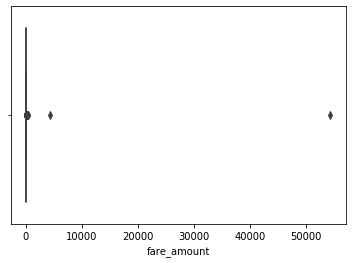

In [9]:
#checking outliers
sns.boxplot(df['fare_amount'])

In [10]:
#Checking irregular values
df.loc[df['fare_amount']<0 , 'fare_amount']

2037    -2.9
2484    -2.5
13030   -3.0
Name: fare_amount, dtype: float64

In [11]:
df.loc[df['fare_amount']>100 , 'fare_amount']

607        453.00
980        434.00
1015     54343.00
1072      4343.00
1481       165.00
12347      104.67
14140      108.00
Name: fare_amount, dtype: float64

In [12]:
#removing rows where fare_amount is less than 0 or more than 100 (outliers)
df=df[df['fare_amount']>0]
df=df[df['fare_amount']<100]
df.shape

(15590, 7)

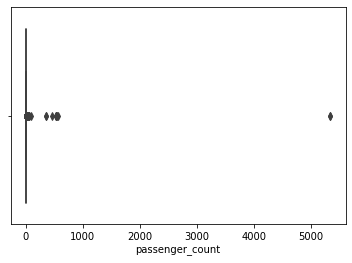

In [13]:
#checking outliers
sns.boxplot(df['passenger_count'])

In [14]:
#cases where there are passengers less than 1
df.loc[df['passenger_count']<1,'passenger_count']

314      0.00
566      0.00
678      0.00
1159     0.00
1933     0.00
2198     0.00
2423     0.00
3032     0.00
3411     0.00
3479     0.00
3487     0.00
3597     0.00
4112     0.00
4246     0.00
4342     0.00
4352     0.00
5056     0.00
5148     0.00
5159     0.00
5275     0.00
5515     0.00
5555     0.00
5686     0.00
5912     0.00
6034     0.00
6573     0.00
6711     0.00
6879     0.00
7277     0.00
7518     0.00
7638     0.00
7907     0.00
8319     0.00
8659     0.00
8860     0.12
8969     0.00
9157     0.00
9963     0.00
10640    0.00
10661    0.00
10709    0.00
11460    0.00
11801    0.00
12214    0.00
12609    0.00
13027    0.00
13225    0.00
13377    0.00
13712    0.00
13740    0.00
14194    0.00
14306    0.00
14870    0.00
15284    0.00
15512    0.00
15552    0.00
15917    0.00
Name: passenger_count, dtype: float64

In [15]:
#and passengers more than 6
df.loc[df['passenger_count']>6,'passenger_count']

263      456.0
293     5334.0
356      535.0
386      354.0
413       55.0
971      554.0
1007      53.0
1043      35.0
1107     345.0
1145    5345.0
1199     536.0
1241      43.0
8443      58.0
8504     537.0
8569      87.0
8629      43.0
8713     531.2
8983     557.0
Name: passenger_count, dtype: float64

In [16]:
#removing cases where passengers are more than 7
df=df[df['passenger_count']<7]
df.shape

(15572, 7)

In [17]:
#imputing the cases where passenger count is 0 with the mode
df.loc[df['passenger_count']<1,'passenger_count']=np.nan
df["passenger_count"].fillna(int(df["passenger_count"].mode()), inplace=True)
df.shape

(15572, 7)

In [18]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,733573,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,733777,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,734367,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,734614,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,733840,-73.968095,40.768008,-73.956655,40.783762,1.0


In [19]:
df['Distance']=df.apply(lambda r:
                        6371.01*acos(sin(radians(r.pickup_latitude))*sin(radians(r.dropoff_latitude))) + cos(radians(r.pickup_latitude))*cos(radians(r.dropoff_latitude))*cos(radians(r.pickup_longitude)-radians(r.dropoff_longitude)),axis=1)

In [20]:
df.shape

(15572, 8)

In [21]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,4.5,733573,-73.844311,40.721319,-73.841610,40.712278,1.0,7207.826936
1,16.9,733777,-74.016048,40.711303,-73.979268,40.782004,1.0,7204.200792
2,5.7,734367,-73.982738,40.761270,-73.991242,40.750562,2.0,7203.072033
3,7.7,734614,-73.987130,40.733143,-73.991567,40.758092,1.0,7204.324394
4,5.3,733840,-73.968095,40.768008,-73.956655,40.783762,1.0,7200.643757


                   fare_amount  pickup_datetime  pickup_longitude  \
fare_amount           1.000000         0.126505          0.020215   
pickup_datetime       0.126505         1.000000          0.014957   
pickup_longitude      0.020215         0.014957          1.000000   
pickup_latitude      -0.015749        -0.012108         -0.668623   
dropoff_longitude     0.018241         0.014639          0.980748   
dropoff_latitude     -0.014792        -0.014187         -0.987484   
passenger_count       0.009454         0.003631          0.004444   
Distance             -0.004815        -0.014179         -0.889449   

                   pickup_latitude  dropoff_longitude  dropoff_latitude  \
fare_amount              -0.015749           0.018241         -0.014792   
pickup_datetime          -0.012108           0.014639         -0.014187   
pickup_longitude         -0.668623           0.980748         -0.987484   
pickup_latitude           1.000000          -0.655886          0.667164   
dro

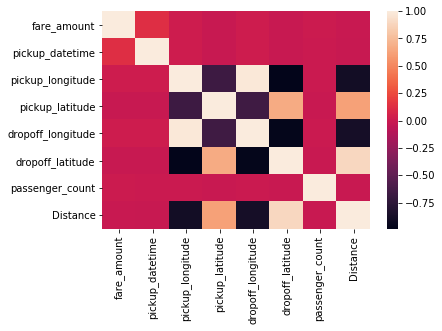

In [22]:
print(df.corr())
map1=sns.heatmap(df.corr())
plt.show()

In [23]:
#LINEAR REGRESSION
reg=LinearRegression()
X=df.iloc[:,1:]
Y=df.iloc[:,0]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
reg=reg.fit(X_train,Y_train)
y_pred=reg.predict(X_test)
y_pred

array([12.19991717,  9.32322609,  9.78655907, ..., 10.91901516,
       10.44104289,  9.2501969 ])

In [26]:
print(f"Mean Squared Error: {np.mean((y_pred-Y_test)**2)}")
print(f"Mean Absolute Error: {mean_absolute_error(Y_test,y_pred)}")
print(f"R2 Score: {r2_score(Y_test,y_pred)}")
mape=np.mean(np.abs((Y_test-y_pred)/Y_test))*100
print(f"MAPE: {mape}")
print(f"Accuracy: {100-mape}")

Mean Squared Error: 243.28747324152098
Mean Absolute Error: 6.200792792465325
R2 Score: -1.7912834574915468
MAPE: 71.77826222784992
Accuracy: 28.221737772150078


In [27]:
#DECISION TREE REGRESSION
reg1=DecisionTreeRegressor()
reg1=reg1.fit(X_train,Y_train)
y_pred1=reg1.predict(X_test)
y_pred1

array([13.  ,  6.9 , 55.83, ..., 19.3 ,  6.5 , 10.1 ])

In [28]:
print(f"Mean Squared Error: {np.mean((y_pred1-Y_test)**2)}")
print(f"Mean Absolute Error: {mean_absolute_error(Y_test,y_pred1)}")
print(f"R2 Score: {r2_score(Y_test,y_pred1)}")
mape=np.mean(np.abs((Y_test-y_pred1)/Y_test))*100
print(f"MAPE: {mape}")
print(f"Accuracy: {100-mape}")

Mean Squared Error: 29.030671294471972
Mean Absolute Error: 2.9577737350058735
R2 Score: 0.6669255861616447
MAPE: 30.49436674235671
Accuracy: 69.5056332576433


In [29]:
#SUPPORT VECTOR MACHINE REGRESSION
from sklearn.svm import SVR
svr=SVR(kernel='rbf')
svr=svr.fit(X_train,Y_train)
y_pred2=svr.predict(X_test)
y_pred2

array([8.40285847, 8.39583046, 8.39837271, ..., 8.39968126, 8.39871429,
       8.39544547])

In [30]:
print(f"Mean Squared Error: {np.mean((y_pred2-Y_test)**2)}")
print(f"Mean Absolute Error: {mean_absolute_error(Y_test,y_pred2)}")
print(f"R2 Score: {r2_score(Y_test,y_pred2)}")
mape=np.mean(np.abs((Y_test-y_pred2)/Y_test))*100
print(f"MAPE: {mape}")
print(f"Accuracy: {100-mape}")

Mean Squared Error: 95.75279907790572
Mean Absolute Error: 5.346321474617574
R2 Score: -0.09859007746501725
MAPE: 42.964513727560565
Accuracy: 57.035486272439435


In [31]:
#K-NEAREST NEIGHBORS REGRESSION
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=5)
knn=knn.fit(X_train,Y_train)
y_pred3=knn.predict(X_test)
y_pred3

array([11.9 ,  9.7 , 11.62, ...,  7.94,  7.06,  7.92])

In [32]:
print(f"Mean Squared Error: {np.mean((y_pred3-Y_test)**2)}")
print(f"Mean Absolute Error: {mean_absolute_error(Y_test,y_pred3)}")
print(f"R2 Score: {r2_score(Y_test,y_pred3)}")
mape=np.mean(np.abs((Y_test-y_pred3)/Y_test))*100
print(f"MAPE: {mape}")
print(f"Accuracy: {100-mape}")

Mean Squared Error: 89.53318045896211
Mean Absolute Error: 6.060739372681069
R2 Score: -0.027231209983461513
MAPE: 62.372639961670984
Accuracy: 37.627360038329016


In [35]:
#RANDOM FOREST REGRESSION
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=500)
rfr=rfr.fit(X_train,Y_train)
y_pred4=rfr.predict(X_test)
y_pred4

array([14.63892   ,  6.4396    , 39.51955111, ..., 17.17762   ,
        7.7056    ,  9.8614    ])

In [36]:
print(f"Mean Squared Error: {np.mean((y_pred4-Y_test)**2)}")
print(f"Mean Absolute Error: {mean_absolute_error(Y_test,y_pred4)}")
print(f"R2 Score: {r2_score(Y_test,y_pred4)}")
mape=np.mean(np.abs((Y_test-y_pred4)/Y_test))*100
print(f"MAPE: {mape}")
print(f"Accuracy: {100-mape}")

Mean Squared Error: 16.966734584946654
Mean Absolute Error: 2.1235587231657367
R2 Score: 0.8053374267749651
MAPE: 22.613915067333036
Accuracy: 77.38608493266696


In [37]:
#TESTING ON ORIGINAL TEST SET
df_test=pd.read_csv(r'C:\Users\Niketa Mittal\Downloads\test.csv')
df_test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [39]:
df_test['pickup_datetime']=pd.to_datetime(df_test['pickup_datetime'])
df_test['pickup_datetime']=df_test['pickup_datetime'].map(datetime.toordinal)
df_test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,735625,-73.973320,40.763805,-73.981430,40.743835,1
1,735625,-73.986862,40.719383,-73.998886,40.739201,1
2,734418,-73.982524,40.751260,-73.979654,40.746139,1
3,734838,-73.981160,40.767807,-73.990448,40.751635,1
4,734838,-73.966046,40.789775,-73.988565,40.744427,1


In [40]:
df_test['Distance']=df_test.apply(lambda r:
                        6371.01*acos(sin(radians(r.pickup_latitude))*sin(radians(r.dropoff_latitude))) + cos(radians(r.pickup_latitude))*cos(radians(r.dropoff_latitude))*cos(radians(r.pickup_longitude)-radians(r.dropoff_longitude)),axis=1)

In [41]:
df_test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,735625,-73.973320,40.763805,-73.981430,40.743835,1,7203.326980
1,735625,-73.986862,40.719383,-73.998886,40.739201,1,7206.308755
2,734418,-73.982524,40.751260,-73.979654,40.746139,1,7203.949384
3,734838,-73.981160,40.767807,-73.990448,40.751635,1,7202.609454
4,734838,-73.966046,40.789775,-73.988565,40.744427,1,7201.712997


In [42]:
rfr1=RandomForestRegressor(n_estimators=500)
rfr1=rfr1.fit(X,Y)
df_test["fare_amount"]=rfr1.predict(df_test)

In [43]:
df_test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,fare_amount
0,735625,-73.973320,40.763805,-73.981430,40.743835,1,7203.326980,9.246000
1,735625,-73.986862,40.719383,-73.998886,40.739201,1,7206.308755,9.079966
2,734418,-73.982524,40.751260,-73.979654,40.746139,1,7203.949384,4.913400
3,734838,-73.981160,40.767807,-73.990448,40.751635,1,7202.609454,11.217000
4,734838,-73.966046,40.789775,-73.988565,40.744427,1,7201.712997,19.355000


In [45]:
df_test.to_csv(r'C:\Users\Niketa Mittal\Downloads\cab_fare_results_python.csv',index=False)

In [46]:
from sklearn.externals import joblib
joblib.dump(rfr1,'Cab_Fare.pkl')

C:\Users\Niketa Mittal\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['Cab_Fare.pkl']